# Домашнее задание №1. SQL

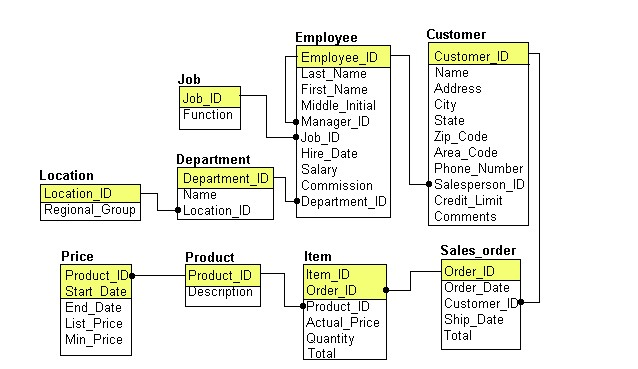

**Первые 20 заданий необходимо выполнять без использования соединений таблиц, в оставшихся 20 соединения таблиц и подзапросы допускаются**

In [ ]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import psycopg2
import pandas as pd

DB_HOST = 'de-edu-db.chronosavant.ru'
DB_USER = 'da11'
DB_USER_PASSWORD = 'gandalfthegrey'
DB_NAME = 'edu'

conn = psycopg2.connect(host=DB_HOST, user=DB_USER, password=DB_USER_PASSWORD, dbname=DB_NAME)

**Пример запроса (не забывайте указывать da. перед названием таблицы):**

In [ ]:
pd.read_sql_query("""
select *
from da.item
""", conn)

<ipython-input-3-66b6ed05ed47>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,order_id,item_id,product_id,actual_price,quantity,total
0,600,1,100861,42.00,1,42.0
1,610,3,100890,58.00,1,58.0
2,611,1,100861,45.00,1,45.0
3,612,1,100860,30.00,100,3000.0
4,601,1,200376,2.40,12,28.8
...,...,...,...,...,...,...
266,546,4,103131,3.90,140,546.0
267,546,5,103140,19.00,40,760.0
268,546,6,103141,20.00,10,200.0
269,510,1,103120,20.88,60,1252.8


### Задание 1
Выбрать коды всех городов, в которых расположены отделы фирмы.

In [ ]:
pd.read_sql_query("""
select location_id
from da.location
""", conn)

<ipython-input-4-599e1f514ceb>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,location_id
0,122
1,124
2,123
3,167


### Задание 2
Для каждого сотрудника определить, какой процент по отношению к зарплате составляют его комиссионные.

In [ ]:
pd.read_sql_query("""
select employee_id, round(((commission/salary)*100),2) as procent
from da.employee
""", conn)

<ipython-input-7-336b011c7f72>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,employee_id,procent
0,7369,NaN
1,7499,18.75
2,7505,NaN
3,7506,NaN
4,7507,NaN
5,7521,40.00
6,7555,24.00
7,7557,96.00
8,7560,NaN
9,7564,24.00


### Задание 3
Вывести два инициала (с точками) и фамилии всех сотрудников

In [ ]:
pd.read_sql_query("""
select CONCAT(SUBSTR(first_name, 1, 1), '.',middle_initial,'. ',last_name)
from da.employee
""", conn)

,concat
0,J.Q. SMITH
1,K.J. ALLEN
2,J.K. DOYLE
3,L.S. DENNIS
4,L.D. BAKER
5,C.D. WARD
6,D.T. PETERS
7,K.P. SHAW
8,S.S. DUNCAN
9,G.J. LANGE


### Задание 4
По каждой сделке вывести точную сумму сделки, сумму сделки, округленную в большую сторону, округленную в меньшую сторону, округленную по общепринятым правилами округления.

In [ ]:
pd.read_sql_query("""
select order_id, sum(total),CEILING(sum(total)),FLOOR(sum(total)),round (sum(total))
from da.item
group by order_id
limit 50
""", conn)

,order_id,sum,ceiling,floor,round
0,617,46370.00,46370.0,46370.0,46370.0
1,574,1685.00,1685.0,1685.0,1685.0
2,546,3663.00,3663.0,3663.0,3663.0
3,620,4450.00,4450.0,4450.0,4450.0
4,562,2044.50,2045.0,2044.0,2045.0
5,616,764.00,764.0,764.0,764.0
6,550,2356.00,2356.0,2356.0,2356.0
7,559,387.20,388.0,387.0,387.0
8,552,555.80,556.0,555.0,556.0
9,607,5.60,6.0,5.0,6.0


### Задание 5
Выбрать фамилии всех сотрудников, у которых комиссионные больше зарплаты.

In [ ]:
pd.read_sql_query("""
select last_name
from da.employee
where COALESCE(commission,0) > salary
""", conn)

,last_name
0,MARTIN


### Задание 6
Выбрать фамилии всех сотрудников, фамилии которых начинаются на букву 'S'.

In [ ]:
pd.read_sql_query("""
select last_name
from da.employee
where last_name like 'S%'
""", conn)

,last_name
0,SMITH
1,SHAW
2,SOMMERS
3,SCOTT


### Задание 7
Выбрать имена всех сотрудников, которые не являются менеджерами (job_id=671) и не работают в отделе SALES в NEW YORK (department_id=13).

In [ ]:
pd.read_sql_query("""
select last_name,first_name
from da.employee
where job_id!=671 and department_id!=13
""", conn)

,last_name,first_name
0,SMITH,JOHN
1,ALLEN,KEVIN
2,WARD,CYNTHIA
3,DUNCAN,SARAH
4,LANGE,GREGORY
5,LEWIS,RICHARD
6,MARTIN,KENNETH
7,SOMMERS,DENISE
8,SCOTT,DONALD
9,WEST,LIVIA


### Задание 8
Выбрать фамилии всех сотрудников, у которых код должности 667 или 670 (CLERK или SALESPERSON).

In [ ]:
pd.read_sql_query("""
select last_name
from da.employee
where job_id = 667 or job_id = 670
""", conn)

,last_name
0,SMITH
1,ALLEN
2,WARD
3,PETERS
4,SHAW
5,DUNCAN
6,LANGE
7,PORTER
8,MARTIN
9,WEST


### Задание 9
Выбрать всех сотрудников, имена которых состоят из 6 букв и начинаются на 'MAR'.

In [ ]:
pd.read_sql_query("""
select last_name, first_name
from da.employee
where length(first_name)=6 and first_name like 'MAR%'
""", conn)

,last_name,first_name
0,BLAKE,MARION


### Задание 10
Выбрать фамилии всех сотрудников, которые поступили на работу после 15 апреля 1985 года.

In [ ]:
pd.read_sql_query("""
select last_name
from da.employee
where date(hire_date) > '1985-04-15'

""", conn)

,last_name
0,DENNIS
1,BAKER
2,DUNCAN
3,LANGE
4,LEWIS
5,MARTIN
6,SOMMERS
7,BLAKE
8,CLARK
9,SCOTT


### Задание 11
Выбрать фамилии всех сотрудников, которые поступили на работу в 1985 году.

In [ ]:
pd.read_sql_query("""
select last_name
from da.employee
where date_part('year', Hire_Date) = '1985'

""", conn)

,last_name
0,ALLEN
1,DOYLE
2,DENNIS
3,BAKER
4,WARD
5,PETERS
6,SHAW
7,DUNCAN
8,LANGE
9,JONES


### Задание 12
Для каждого сотрудника выбрать количество **полных** лет работы в фирме.

In [ ]:
pd.read_sql_query("""
select last_name, date_part('year',age(Hire_Date::date))
from da.employee


""", conn)

,last_name,date_part
0,SMITH,38.0
1,ALLEN,37.0
2,DOYLE,37.0
3,DENNIS,37.0
4,BAKER,37.0
5,WARD,37.0
6,PETERS,37.0
7,SHAW,37.0
8,DUNCAN,37.0
9,LANGE,37.0


### Задание 13
Выбрать количество сотрудников, получающих комиссионные. Если сотрудник получает 0 комиссионных, то это тоже считается. Не считаются только NULL.

In [ ]:
pd.read_sql_query("""
select count(*)
from da.employee
where commission >=0
""", conn)

,count
0,10


### Задание 14
Выбрать количество и общую сумму сделок, совершенных с покупателем, код которого - 104.

In [ ]:
pd.read_sql_query("""
select sum(total),count(*)
from sales_order
group by customer_id
having customer_id = 104
""", conn)

,sum,count
0,7160.8,4


### Задание 15
Выбрать среднюю зарплату по каждой должности.

In [ ]:
pd.read_sql_query("""
select job_id, round(avg(salary),2)
from employee
group by job_id
""", conn)

,job_id,round
0,667,921.43
1,668,1825.00
2,670,1331.82
3,669,2968.75
4,672,5000.00
5,671,2725.00


### Задание 16
Выбрать среднюю зарплата продавцов (код должности - 670).

In [ ]:
pd.read_sql_query("""
select job_id, round(avg(salary),2)
from employee
group by job_id
having job_id = 670
""", conn)

,job_id,round
0,670,1331.82


### Задание 17
 Выбрать средние зарплаты продавцов (код должности - 670) и клерков (код должности - 667).

In [ ]:
pd.read_sql_query("""
select job_id, round(avg(salary),2)
from employee
group by job_id
having job_id in(670,667)
""", conn)

,job_id,round
0,667,921.43
1,670,1331.82


### Задание 18
Выбрать коды продуктов, по которым было совершено меньше 10 продаж (фактов продаж, не кол-во проданных продуктов).



In [ ]:
pd.read_sql_query("""
select product_id,count(order_id)
from item
group by product_id
having count(order_id) <10
""", conn)

,product_id,count
0,104361,3
1,104360,5
2,100890,6
3,105127,3
4,102132,7
5,100860,9
6,105125,2
7,102130,6
8,103121,8
9,101863,3


### Задание 19
Выбрать максимальную зарплату продавцов (код должности - 670) по каждому отделу.

In [ ]:
pd.read_sql_query("""
select department_id,max(salary)
from employee
where job_id=670
group by department_id

""", conn)

,department_id,max
0,13,1250.0
1,23,1500.0
2,30,1600.0
3,43,1300.0


### Задание 20
Выбрать список сотрудников фирмы в алфавитном порядке.

In [ ]:
pd.read_sql_query("""
select last_name
from employee
order by last_name

""", conn)

,last_name
0,ADAMS
1,ALBERTS
2,ALLEN
3,BAKER
4,BLAKE
5,CLARK
6,DENNIS
7,DOUGLAS
8,DOYLE
9,DUNCAN


### Задание 21
Выбрать всю информацию о каждом отделе и месте его расположения.

In [ ]:
pd.read_sql_query("""
select department.department_id,department.name,department.location_id,location.regional_group
from department join location on department.location_id=location.location_id


""", conn)

,department_id,name,location_id,regional_group
0,10,ACCOUNTING,122,NEW YORK
1,20,RESEARCH,124,DALLAS
2,30,SALES,123,CHICAGO
3,40,OPERATIONS,167,BOSTON
4,12,RESEARCH,122,NEW YORK
5,13,SALES,122,NEW YORK
6,14,OPERATIONS,122,NEW YORK
7,23,SALES,124,DALLAS
8,24,OPERATIONS,124,DALLAS
9,34,OPERATIONS,123,CHICAGO


### Задание 22
Выбрать список фамилий сотрудников по городам, где они работают, с указанием для каждого его должности.

In [ ]:
pd.read_sql_query("""
select last_name,regional_group,function
from employee join job on employee.job_id=job.job_id
join department on employee.department_id=department.department_id
join location on department.location_id=location.location_id
""", conn)

,last_name,regional_group,function
0,SMITH,DALLAS,CLERK
1,ALLEN,CHICAGO,SALESPERSON
2,DOYLE,NEW YORK,MANAGER
3,DENNIS,DALLAS,MANAGER
4,BAKER,NEW YORK,MANAGER
5,WARD,CHICAGO,SALESPERSON
6,PETERS,NEW YORK,SALESPERSON
7,SHAW,NEW YORK,SALESPERSON
8,DUNCAN,DALLAS,SALESPERSON
9,LANGE,DALLAS,SALESPERSON


### Задание 23
 Выбрать всех покупателей, с которыми работает продавец TURNER.

In [ ]:
pd.read_sql_query("""
select customer_id,last_name
from customer join employee on customer.salesperson_id=employee.employee_id
where last_name = 'TURNER'


""", conn)

,customer_id,last_name
0,100,TURNER
1,105,TURNER
2,108,TURNER


### Задание 24
Выбрать сотрудников, которые не закреплены за конкретным заказчиком.

In [ ]:
pd.read_sql_query("""
select
   e.*
from da.employee e
left join da.customer c
  on c.salesperson_id = e.employee_id
where c.salesperson_id is null

""", conn)

<ipython-input-10-a8193453b58a>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,employee_id,last_name,first_name,middle_initial,manager_id,job_id,hire_date,salary,commission,department_id
0,7369,SMITH,JOHN,Q,7902.0,667,1984-12-17,800.0,None,20
1,7505,DOYLE,JEAN,K,7839.0,671,1985-04-04,2850.0,None,13
2,7506,DENNIS,LYNN,S,7839.0,671,1985-05-15,2750.0,None,23
3,7507,BAKER,LESLIE,D,7839.0,671,1985-06-10,2200.0,None,14
4,7566,JONES,TERRY,M,7839.0,671,1985-04-02,2975.0,None,20
5,7569,ALBERTS,CHRIS,L,7839.0,671,1985-04-06,3000.0,None,12
6,7609,LEWIS,RICHARD,M,7507.0,668,1985-04-16,1800.0,None,24
7,7676,SOMMERS,DENISE,D,7507.0,668,1985-04-19,1850.0,None,34
8,7698,BLAKE,MARION,S,7839.0,671,1985-05-01,2850.0,None,30
9,7782,CLARK,CAROL,F,7839.0,671,1985-06-09,2450.0,None,10


### Задание 25
Выбрать имена продавцов, которые работают более чем с одним покупателем и названия покупателей, которых они обслуживают.

In [ ]:
pd.read_sql_query("""
select last_name,name
from customer join employee on customer.salesperson_id = employee.employee_id
group by last_name,name
having sum(salesperson_id) >1
order by last_name


""", conn)

,last_name,name
0,ALLEN,EVERY MOUNTAIN
1,ALLEN,WOMENS SPORTS
2,DUNCAN,AL AND BOB'S SPORTS
3,DUNCAN,THE POWER FORWARD
4,LANGE,"HIT, THROW, AND RUN"
5,LANGE,AL'S PRO SHOP
6,MARTIN,BOB'S FAMILY SPORTS
7,MARTIN,VOLLYRITE
8,PETERS,CENTURY SHOP
9,PETERS,FITNESS FIRST


### Задание 26
Выбрать сумму всех продаж, которые обеспечил продавец TURNER.

In [ ]:
pd.read_sql_query("""
select sum(total)
from sales_order
where customer_id in (select customer_id
from customer join employee on customer.salesperson_id=employee.employee_id
where last_name = 'TURNER')


""", conn)

,sum
0,58055.9


### Задание 27
Выбрать сумму всех продаж товаров, связанных с теннисом, за лето 1990г. Будьте внимательны с выбором total? Ответьте себе на вопрос: нужен total из таблицы item или из таблицы sales_order, почему?

In [ ]:
pd.read_sql_query("""
select sum(item.total)
from item join sales_order on item.order_id=sales_order.order_id
join product on item.product_id=product.product_id
where order_date between '1990.06.01' and '1990.08.31' and description like'%TENN%'

""", conn)

,sum
0,8492.7


### Задание 28
Выбрать имена и зарплаты самого старого и самого молодого сотрудника фирмы. ("Возраст" сотрудника определять по дате его поступления на работу в фирму).

In [ ]:
pd.read_sql_query("""
select last_name,salary
from employee
where hire_date = (select max(hire_date) from employee) or hire_date =(select min(hire_date) from employee)

""", conn)

,last_name,salary
0,SMITH,800.0
1,MURRAY,750.0


### Задание 29
Для каждого продавца вывести разность между его зарплатой и средней зарплатой продавцов в фирме (только продавцов, это отдельная должность).

In [ ]:
pd.read_sql_query("""
select last_name, round(
                        abs(salary-(select avg(salary) 
                        from employee join job on employee.job_id=job.job_id 
                        where function = 'SALESPERSON')),2) 
                        as dif_salary
from employee join job on employee.job_id=job.job_id
where function = 'SALESPERSON'

""", conn)

,last_name,dif_salary
0,ALLEN,268.18
1,WARD,81.82
2,PETERS,81.82
3,SHAW,81.82
4,DUNCAN,81.82
5,LANGE,81.82
6,PORTER,81.82
7,MARTIN,81.82
8,WEST,168.18
9,ROSS,31.82


### Задание 30
Вывести имена, средние инициалы и фамилии всех однофамильцев. (Удобно использовать подзапрос)

In [ ]:
pd.read_sql_query("""

select last_name,
       first_name,
       middle_initial
from employee

where middle_initial in (select last_name
                        from employee
                        group by last_name
                        having count(last_name) >1)

""", conn)

,last_name,first_name,middle_initial


### Задание 31
Для каждого отдела выбрать процент, который составляют сотрудники отдела от общего числа сотрудников фирмы, и процент, который составляет зарплата отдела от общей зарплаты фирмы.

In [ ]:
pd.read_sql_query("""
with emps as (
  select cast(count(*) as float) as cnt,
        sum(salary) as sal
  from da.employee)
select 
  e.department_id,
  100*count(*)/emps.cnt as emp_percent,
  round(100*sum(e.salary)/emps.sal, 3) as sal_percent
from da.employee e
join emps 
  on 1 = 1
group by e.department_id, emps.cnt, emps.sal
""", conn)

<ipython-input-13-4295da681ecd>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,department_id,emp_percent,sal_percent
0,13,15.625,12.109
1,34,3.125,3.048
2,20,15.625,17.916
3,10,9.375,14.415
4,23,15.625,12.356
5,30,18.750,15.486
6,43,3.125,2.142
7,24,3.125,2.965
8,14,3.125,3.624
9,12,12.500,15.939


### Задание 32
Выбрать фамилии начальников тех отделов, которые имеют разветвленную структуру (т.е. тех начальников, у прямых подчиненных которых есть свои подчиненные).

Здесь предлагается следовать следующей логике:

Выбрать коды всех сотрудников, которые являются начальниками -> 

Выбрать коды начальников для всех, чьи коды вошли в предыдущую выборку -> 

Выбрать имена всех, чьи коды вошли в предыдущую выборку

In [ ]:
pd.read_sql_query("""
select
  last_name
from employee
where employee_id in(
  select distinct
    manager_id
  from employee
  where employee_id in(select distinct manager_id from employee))

""", conn)

<ipython-input-11-1ef649d9c5d1>:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query("""


,last_name
0,JONES
1,ALBERTS
2,KING


### Задание 33
Выбрать название отдела, заключившего сделки на самую большую сумму, и города, в котором он находится. Здесь удобно применить подзапросы, хотя можно сделать и с помощью соединений таблиц.

In [ ]:
pd.read_sql_query("""
select name_dep,city,viruchka
from (select
       department.name as name_dep,
       location.regional_group as city,
       sum(sales_order.total) as viruchka,
       row_number() OVER (order by sum(sales_order.total) desc)  AS rn 
from sales_order join customer on sales_order.customer_id=customer.customer_id
    join employee on customer.salesperson_id=employee.employee_id
    join department on department.department_id=employee.department_id
    join location on department.location_id=location.location_id

group by department.name, location.regional_group) as t
where rn=1

""", conn)

,name_dep,city,viruchka
0,SALES,CHICAGO,103258.9


### Задание 34
Выбрать название товара, дату продажи, цену продажи для всех случаев, когда товары продавались ниже, чем за 75% их объявленной цены.

**В заданиях подобным этому, не забудьте о том как действует цена в этой базе: она действует от price.start_date до price.end_date, причем если price.end_date IS NULL, то цена действует до сих пор!**

In [ ]:
pd.read_sql_query("""
select product.description as pr_name,
       sales_order.order_date as data,
       item.actual_price as price,
       price.list_price,
       start_date,	end_date
from sales_order join item on sales_order.order_id=item.order_id
    join product on item.product_id=product.product_id
    join price on item.product_id=price.product_id
where ( sales_order.order_date between price.start_date and COALESCE(price.end_date,CURRENT_DATE)) and item.actual_price <= list_price*0.75
""", conn)

,pr_name,data,price,list_price,start_date,end_date
0,SB ENERGY BAR-6 PACK,1991-02-02,1.75,2.4,1990-11-15,NaT
1,YELLOW JERSEY BICYCLE GLOVES,1990-03-04,9.00,12.0,1990-01-01,1990-05-31
2,YELLOW JERSEY BICYCLE GLOVES,1990-09-04,10.00,15.0,1990-06-01,NaT
3,YELLOW JERSEY BICYCLE GLOVES,1991-03-04,10.00,15.0,1990-06-01,NaT


### Задание 35
Выбрать общую сумму скидок, предоставленных покупателю STADIUM SPORTS в 1989г.

**Скидка здесь это list_price*quantity-item.total**

In [ ]:
pd.read_sql_query("""
select sum(list_price*quantity-item.total) 
from sales_order join customer on sales_order.customer_id=customer.customer_id
join item on sales_order.order_id=item.order_id
join product on product.product_id=item.product_id
join price on product.product_id=price .product_id
where customer.name = 'STADIUM SPORTS' and order_date between '1989-01-01' and '1989-12-31'
""", conn)

,sum
0,1519.8


### Задание 36
Выбрать список сотрудников фирмы с указанием фамилии непосредственного начальника каждого. С помощью alias-ов можно соединять таблицы сами с собой

In [ ]:
pd.read_sql_query("""
select a1.last_name as empl,
       b1.last_name as manager
from employee a1 join employee b1 on a1.manager_id = b1.employee_id
""", conn)

,empl,manager
0,SMITH,FORD
1,ALLEN,BLAKE
2,DOYLE,KING
3,DENNIS,KING
4,BAKER,KING
5,WARD,BLAKE
6,PETERS,DOYLE
7,SHAW,DOYLE
8,DUNCAN,DENNIS
9,LANGE,DENNIS


### Задание 37
 Для каждого сотрудника вывести разность между его зарплатой и средней зарплатой сотрудников, выполняющих те же функции.

In [ ]:
pd.read_sql_query("""
select job.function,
       last_name,
       round((salary-avg_salary),2)
       
from employee join job on employee.job_id=job.job_id
              join (select function,avg(salary) as avg_salary
                    from employee join job on employee.job_id=job.job_id
                    group by function) as t1 
on job.function=t1.function

""", conn)

,function,last_name,round
0,CLERK,SMITH,-121.43
1,SALESPERSON,ALLEN,268.18
2,MANAGER,DOYLE,125.00
3,MANAGER,DENNIS,25.00
4,MANAGER,BAKER,-525.00
5,SALESPERSON,WARD,-81.82
6,SALESPERSON,PETERS,-81.82
7,SALESPERSON,SHAW,-81.82
8,SALESPERSON,DUNCAN,-81.82
9,SALESPERSON,LANGE,-81.82


### Задание 38
Вывести таблицу распределения объема продаж товара DUNK BASKETBALL INDOOR по годам. (объем продаж в деньгах)



In [ ]:
pd.read_sql_query("""
select sum(item.total), 
       cast(extract(year from sales_order.ship_date) as int)
from item join sales_order on item.order_id=sales_order.order_id
          join product on product.product_id=item.product_id
where product.description = 'DUNK BASKETBALL INDOOR'
group by extract(year from sales_order.ship_date)

""", conn)

,sum,extract
0,5830.0,1989
1,5337.3,1990
2,3597.0,1991


### Задание 39
Выбрать фамилии тех сотрудников, у которых суммарный доход (зарплата + комиссионные) больше 2000.

Нужно учесть случай, когда либо зарплата, либо комиссионные IS NULL, поскольку сама по себе зарплата или сами по себе комиссионные могут быть уже больше 2000, а любое число + NULL как мы знаем дает NULL.

In [ ]:
pd.read_sql_query("""
select last_name
from employee
where (COALESCE(salary,0)+COALESCE(commission,0)) >2000
""", conn)

,last_name
0,DOYLE
1,DENNIS
2,BAKER
3,SHAW
4,JONES
5,ALBERTS
6,PORTER
7,MARTIN
8,BLAKE
9,CLARK


### Задание 40
Выбрать названия товаров, для которых нынешняя цена увеличилась по сравнению с ценой на 15 декабря 1989г. более, чем на 15%.

Здесь удобно делать задачу по частям

1. Получите цену на 15 декабря 1989г.
2. Получите цену, действующую сейчас
3. Соедините эти два запроса

Сравнивать тут нужно только list_price.

In [ ]:
pd.read_sql_query("""
select description
from product
where 

select price.list_price
from item join sales_order on item.order_id=sales_order.order_id
          join product on product.product_id=item.product_id
          join price on product.product_id=price.product_id
where end_date is null

select list_price,start_date,end_date
from price
where '1989-12-15' >= start_date and '1989-12-15' <= COALESCE(end_date,CURRENT_DATE)


""", conn)

,description,list_price
0,ACE TENNIS RACKET II,45.0
1,ACE TENNIS NET,58.0
2,ACE TENNIS RACKET II,45.0
3,ACE TENNIS RACKET I,35.0
4,SB ENERGY BAR-6 PACK,2.4
...,...,...
266,"WIFF SOFTBALL, LARGE",4.5
267,WIFF SOFTBALL MITT (LH),20.0
268,WIFF SOFTBALL MITT (RH),20.0
269,WIFF SOFTBALL BAT I,25.0


In [ ]:
pd.read_sql_query("""
select description
from product join (select list_price,product_id from price where end_date is null) as t1 on product.product_id=t1.product_id
             join (select list_price,product_id from price where '1989-12-15' >= start_date and '1989-12-15' <= COALESCE(end_date,CURRENT_DATE)) as t2 on product.product_id=t2.product_id
where t1.list_price >= (t2.list_price*1.15) 

""", conn)

,description
0,ACE TENNIS RACKET I
1,ACE TENNIS RACKET II
2,DUNK BASKETBALL PROFESSIONAL
3,YELLOW JERSEY BICYCLE GLOVES
4,YELLOW JERSEY WATER BOTTLE
5,YELLOW JERSEY BOTTLE CAGE
